# Part I - Loan Data from Prosper
## by Zijin (Ginn) Cheng

## Introduction

> This [dataset]('source_data/prosperLoanData.csv') contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The definition of the column names can be found in [prosper-loan-data-variable-definitions](https://video.udacity-data.com/topher/2023/December/6571fe24_prosper-loan-data-variable-definitions/prosper-loan-data-variable-definitions.xlsx).

## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
%ls source_data

prosperLoanData.csv


In [6]:
# take a look at the source data
df = pd.read_csv('source_data/prosperLoanData.csv', na_values=['Not available','Not displayed'])
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,NaN,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,

> There are 81 variables, but I am going to look only at the columns of interest

In [7]:
# get the columns of interest
# selected_col = ['ProsperRating (numeric)','BorrowerRate', 'ListingCategory (numeric)',
#                 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange',
#                 'IncomeVerifiable', 'TotalProsperPaymentsBilled', 'OpenRevolvingMonthlyPayment',
#                 'StatedMonthlyIncome', 'MonthlyLoanPayment'] 
selected_col = ['BorrowerRate', 'ListingCategory (numeric)',
                'BorrowerState', 'IncomeRange','IncomeVerifiable',
                'StatedMonthlyIncome','MonthlyLoanPayment'] 

In [8]:
# get the selected df
dfsl = df.loc[:,df.columns.isin(selected_col)]
dfsl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BorrowerRate               113937 non-null  float64
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IncomeRange                106196 non-null  object 
 4   IncomeVerifiable           113937 non-null  bool   
 5   StatedMonthlyIncome        113937 non-null  float64
 6   MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 5.3+ MB


In [9]:
dfsl.describe()

,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,MonthlyLoanPayment
count,113937.000000,113937.000000,1.139370e+05,113937.000000
mean,0.192764,2.774209,5.608026e+03,272.475783
std,0.074818,3.996797,7.478497e+03,192.697812
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.134000,1.000000,3.200333e+03,131.620000
50%,0.184000,1.000000,4.666667e+03,217.740000
75%,0.250000,3.000000,6.825000e+03,371.580000
max,0.497500,20.000000,1.750003e+06,2251.510000


In [10]:
# take a look at the unique values of interest
for col in dfsl.columns:
    print(col,':',dfsl[col].unique())

BorrowerRate : [0.158  0.092  0.275  ... 0.2037 0.2309 0.0739]
ListingCategory (numeric) : [ 0  2 16  1  7 13  6 15 20 19  3 18  8  4 11 14  5  9 17 10 12]
BorrowerState : ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'MO'
 'NE' 'UT' 'DC' 'MA' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'MT'
 'HI' 'NH' 'VT' 'WY' 'ME' 'AK' 'IA' 'SD' 'ND']
IncomeRange : ['$25,000-49,999' '$50,000-74,999' nan '$100,000+' '$75,000-99,999'
 '$1-24,999' 'Not employed' '$0']
IncomeVerifiable : [ True False]
StatedMonthlyIncome : [ 3083.333333  6125.        2083.333333 ...  2608.25      1539.166667
 18756.      ]
MonthlyLoanPayment : [330.43 318.93 123.32 ...  29.52 300.95 132.11]


> Firstly to format the column names so that calling columns is much easier.

In [11]:
dfsl.columns = dfsl.columns.str.extract(r'(\w+)')[0]
dfsl.columns

Index(['BorrowerRate', 'ListingCategory', 'BorrowerState', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment'], dtype='object', name=0)

> The ListingCategory is in numeric format which is not directly readable. Create a new column Category to link the numeric numbers with categorical names. Mapping it to a new column can help to clean out the NA values.

In [12]:
cate_dict = {0:np.nan, 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business',
             4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption',
             9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
             13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 
             16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

In [13]:
dfsl['Category'] = dfsl.ListingCategory.replace(cate_dict)

> The BorrowerRate is in raw float format. It will be more readable to create a new column to scale the BorrowerRate to a percentage scale.

In [14]:
dfsl['ScaledBorrowerRate'] = dfsl.BorrowerRate*100

> Take a look at the null values

In [15]:
dfsl.isnull().sum()

0
BorrowerRate               0
ListingCategory            0
BorrowerState           5515
IncomeRange             7741
IncomeVerifiable           0
StatedMonthlyIncome        0
MonthlyLoanPayment         0
Category               16965
ScaledBorrowerRate         0
dtype: int64

> The maximum and minimum null values are in BorrowerState and Category. As I am not going to use BorrowerState, the column will be dropped.

In [16]:
dfsl.drop('BorrowerState',axis=1,inplace=True)

In [17]:
null_ratio = dfsl.Category.isnull().sum()/dfsl.Category.count()*100
print(f'The percentage of null values in Category is {null_ratio}%')

The percentage of null values in Category is 17.49474074990719%


> The NA value percentage is a bit high. Further data completeness may need to be complemented. However, due to a limited time, the null values are decided to be dropped. If time is sufficient, data imputation should be discussed and implemented.

In [18]:
dfsl.dropna(inplace=True)

> Final check on the data

In [19]:
dfsl.head()

,BorrowerRate,ListingCategory,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Category,ScaledBorrowerRate
1,0.0920,2,"$50,000-74,999",True,6125.000000,318.93,Home Improvement,9.20
3,0.0974,16,"$25,000-49,999",True,2875.000000,321.45,Motorcycle,9.74
4,0.2085,2,"$100,000+",True,9583.333333,563.97,Home Improvement,20.85
5,0.1314,1,"$100,000+",True,8333.333333,342.37,Debt Consolidation,13.14
6,0.2712,1,"$25,000-49,999",True,2083.333333,122.67,Debt Consolidation,27.12


In [20]:
dfsl.describe()

,BorrowerRate,ListingCategory,StatedMonthlyIncome,MonthlyLoanPayment,ScaledBorrowerRate
count,96972.000000,96972.000000,9.697200e+04,96972.000000,96972.000000
mean,0.194721,3.259549,5.769697e+03,281.677134,19.472091
std,0.076052,4.145730,7.830536e+03,189.384466,7.605179
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,0.134900,1.000000,3.333333e+03,144.132500,13.490000
50%,0.184500,1.000000,4.867333e+03,236.360000,18.450000
75%,0.256600,3.000000,7.041667e+03,380.090000,25.660000
max,0.360000,20.000000,1.750003e+06,2251.510000,36.000000


In [21]:
dfsl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96972 entries, 1 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BorrowerRate         96972 non-null  float64
 1   ListingCategory      96972 non-null  int64  
 2   IncomeRange          96972 non-null  object 
 3   IncomeVerifiable     96972 non-null  bool   
 4   StatedMonthlyIncome  96972 non-null  float64
 5   MonthlyLoanPayment   96972 non-null  float64
 6   Category             96972 non-null  object 
 7   ScaledBorrowerRate   96972 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 6.0+ MB


### What is the structure of your dataset?

> It is tabular dataset.
### What is/are the main feature(s) of interest in your dataset?

> The main feature focuses on the information of borrowers who applied loans from Prosper. The main feature of interest is about how the borrowers' information relates to their listings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Based on the feature, the investigation will be supported by the following columns:

* BorrowerRate: The Borrower's interest rate for this loan. 
* ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - * Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
* IncomeRange: The income range of the borrower at the time the listing was created.
* StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
* MonthlyLoanPayment: The scheduled monthly loan payment.

## Univariate Exploration

**Step 1** 
* In this section, the investigation focuses on **the borrowing rates** and **the top listing categories**. The borrower rate distribution and the top listing categories will be the two starting dimensions of this investigation.

**Figure 1** - How is the borrowing rate distributed?

Text(0.5, 1.0, 'The percentage of the borrower rate across all loans')

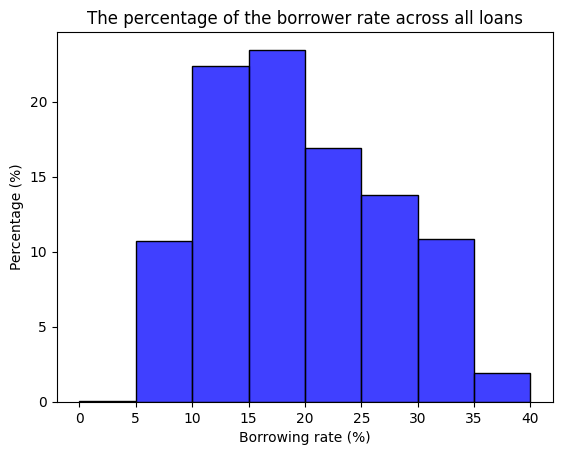

In [22]:
# show the histo of the borrowing rates
bin_sl = np.arange(0,40+5,5)
ax = sns.histplot(data=dfsl, x='ScaledBorrowerRate', bins=bin_sl, stat='percent', color='blue')
# ax.patches[3].set_facecolor('red')
ax.set_xlabel('Borrowing rate (%)')
ax.set_ylabel('Percentage (%)')
ax.set_title('The percentage of the borrower rate across all loans')

**Summary** - It is observed that the borrowing rate resembles a normal distribution but right-skewed. Most of the listings were documented with a borrowing rate betweet 15-20%.

**Figure 2** - What are the most popluar categories among the borrowers?

Text(0.5, 1.0, 'The top 8 listing catetories')

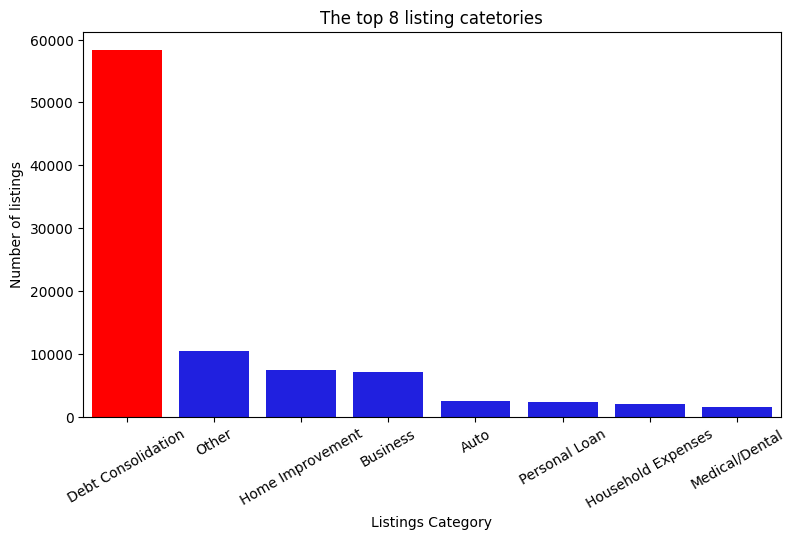

In [23]:
# obtain the top Categories of the loan listings
cate_tops = dfsl.Category.value_counts().keys()[:8]
# plot the countplot
plt.figure(figsize=(9,5))
ax = sns.countplot(data=dfsl[dfsl.Category.isin(cate_tops)], x='Category', color='blue', order=cate_tops)
ax.patches[0].set_facecolor('red')
plt.xticks(rotation=30)
ax.set_xlabel('Listings Category')
ax.set_ylabel('Number of listings')
ax.set_title('The top 8 listing catetories')

**Summary** - It is observed that amongst the top popular categories, Debt Consolidation significantly dominates the loan categories.

In [24]:
# check the statistics of the numeric values
dfsl.describe()

,BorrowerRate,ListingCategory,StatedMonthlyIncome,MonthlyLoanPayment,ScaledBorrowerRate
count,96972.000000,96972.000000,9.697200e+04,96972.000000,96972.000000
mean,0.194721,3.259549,5.769697e+03,281.677134,19.472091
std,0.076052,4.145730,7.830536e+03,189.384466,7.605179
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,0.134900,1.000000,3.333333e+03,144.132500,13.490000
50%,0.184500,1.000000,4.867333e+03,236.360000,18.450000
75%,0.256600,3.000000,7.041667e+03,380.090000,25.660000
max,0.360000,20.000000,1.750003e+06,2251.510000,36.000000


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the original BorrowingRate, the maximum rate is around 50%, which is away from the IQR values. This can be an outlier of the distribution. However, after dropping NA records, this outlier is eliminated and not observable in Figure 1.

> There are outliers in other columns including StatedMonthlyIncome and MonthlyLoanPayment. Keeping these outlier values can be somehow informative to completment to an further individual analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are no observable unusual distribution. However, in the ListingCategory, the numeric value, 0, denotes Not Available as per the column name definition. To avoid a misleading distribution of the Categories, this NA value is cleaned before plotting the Category distribution.

## Bivariate Exploration

**Step 2** 
* Based on the previous analysis on the borrower rate, a further discussion on how the monthly loan payment relates to the borrower rate is conducted.
* Based on the top categories observed above, how does the borrower rate vary among the popular loan categories?

**Figure 3** - How does the borrowing rate relate to the monthly payment?

In [25]:
dfsl.columns

Index(['BorrowerRate', 'ListingCategory', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Category', 'ScaledBorrowerRate'], dtype='object', name=0)

Text(0.5, 1.0, 'How does the borrower rate relate to the montly loan payment?')

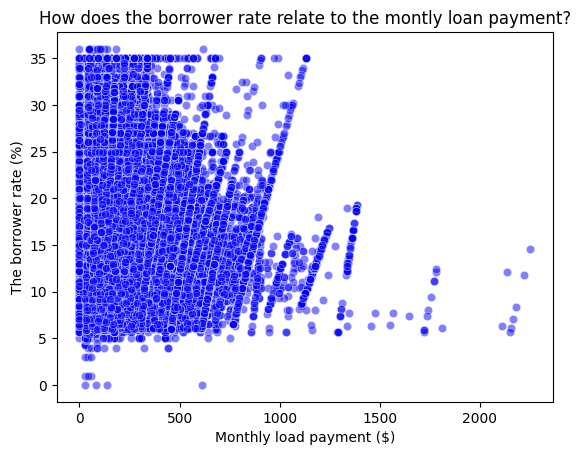

In [26]:
# plot the scatter plot
ax = sns.scatterplot(data=dfsl, y='ScaledBorrowerRate', x='MonthlyLoanPayment', color='blue', alpha=0.5)
ax.set_xlabel('Monthly load payment ($)')
ax.set_ylabel('The borrower rate (%)')
ax.set_title('How does the borrower rate relate to the montly loan payment?')

**Summary** - In the scatter plot, there is no observable trend between the borrowing rate and monthly load payment. However, it can be seen that, a large-amount monthly payment (e.g., over \\$1000) is normally with a relatively low borrowing rate below 15\%.

**Figure 4** - Among the top 4 categories, how is the borrower rate distributed?

In [27]:
# define a function to scale the ticks
def ticks_scaler(get_ticks, scale_ratio):
    scaled_ticks = [int(tick*scale_ratio) for tick in get_ticks]
    return scaled_ticks

Text(0.5, 1.0, 'The borrower rates among the top 4 popular listing categories')

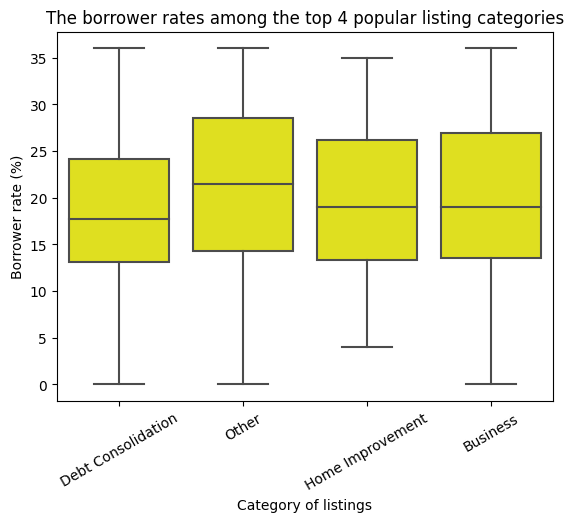

In [28]:
# plot the boxplot
cate_tops = dfsl.Category.value_counts().keys()[:4]
ax = sns.boxplot(data=dfsl[dfsl.Category.isin(cate_tops)], x='Category', y='ScaledBorrowerRate', order=cate_tops, color='yellow')
# ax.set_yticklabels(ticks_scaler(ax.get_yticks(), 100))
plt.xticks(rotation=30)
ax.set_xlabel('Category of listings')
ax.set_ylabel('Borrower rate (%)')
ax.set_title('The borrower rates among the top 4 popular listing categories')

**Summary** - Figure 4 plots the boxplots of the borrowers rates among the top 4 loan categories. It can be seen from the IQRs, Debt Consolidation is somehow with a lower median borrower rate and a narrower rate range compared with other 3 top categories.

> To complement Figure 3, Figure 5 quantifies the proportion of the loans with respect to the BorrowerRate and MonthlyLoanPayment

**Figure 5** The heatmap of the monthly loan payment and the borrower rate

In [29]:
# define bins cut function
def bin_steps(data, num_of_bins):
    ''' The output is a set of equally spaced bins'''
    hist_bins = np.linspace(np.floor(data.min()),np.ceil(data.max()), num_of_bins)
    return hist_bins

In [30]:
# set the bins for a heatmap
x_bins, y_bins = bin_steps(dfsl.ScaledBorrowerRate,10), bin_steps(dfsl.MonthlyLoanPayment,10)
dfsl['BorrowerRateRange'], dfsl['MonthlyLoanPaymentRange'] = pd.cut(dfsl.ScaledBorrowerRate,bins=x_bins), pd.cut(dfsl.MonthlyLoanPayment,bins=y_bins)

In [31]:
# get the mid values of each bins with a proper scaling
hist_x, hist_y = np.round((x_bins[1:]+x_bins[0:-1])/2).astype(int), np.round((y_bins[1:]+y_bins[0:-1])/2).astype(int)
print(hist_x,hist_y)

[ 2  6 10 14 18 22 26 30 34] [ 125  375  626  876 1126 1376 1626 1877 2127]


In [32]:
# get the groupby dataframe
dfhtmp = dfsl.groupby(['BorrowerRateRange','MonthlyLoanPaymentRange']).BorrowerRate.count()/dfsl.BorrowerRate.count()*100
dfhtmp = dfhtmp.unstack()

Text(50.72222222222221, 0.5, 'Borrower rate (%)')

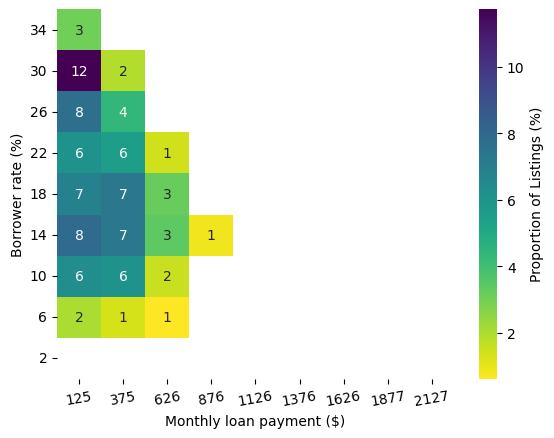

In [35]:
# get the 2d z-values
ax = sns.heatmap(data=dfhtmp.mask(dfhtmp<0.6), cmap='viridis_r', 
                 annot=True, fmt='.0f', cbar_kws={'label':'Proportion of Listings (%)', 'format':'%d'})
ax.set_xticks(ax.get_xticks(),hist_y)
ax.set_yticks(ax.get_yticks(),hist_x)
ax.invert_yaxis()
plt.xticks(rotation=10)
ax.set_xlabel('Monthly loan payment ($)')
ax.set_ylabel('Borrower rate (%)')
# ax.set_xlim(0,5)
# ax.set_ylim(0,5)

**Summary** - It can be seen that around 12% of the loans are with a mid monthly pay of $125 but a relatively high borrower rate of 30\%. The level is significantly higher than other cells in the heatmap, which may indicate that when the loan payment is relatively low, borrowers are not senstive to the borrower rates.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In figure 4, it can be seen that from the IQRs, Debt Consolidation is somehow with a lower median borrower rate and a narrower rate range compared with other 3 top categories.

> _Debt Consolidation_, _Home Improvement_ and _business_ are somehow skewed statistically, whilst the load category _other_ resemble a normal distribution.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In Figure 3, there is no observable trend between the borrowing rate and monthly loan payment. However, it can be seen that, a large-amount monthly payment (e.g., over \\$1000) is normally with a relatively low interest rate below 15\%.

> In Figure 5, most loans are with a mid monthly pay of $125 but a relatively high borrower rate of 30%. Combining Figure 3 and 5, it is found that with high monthly pay the borrower rate is somehow limited to a lower value, but when the monthly pay is very low, the borrowers are somehow insensitve to the high borrower rate.

## Multivariate Exploration

**Step 3**
* To complement the previous study, the borrower rate is investigated in the dimensions of the top loan categories and income ranges. Here, the income ranges are selected with the highest 5 only.
* To complement the previous study, a further investigation is conducted on how the monthly loan pay relates to the borrowers' stated income in each loan category.

In [36]:
dfsl.columns

Index(['BorrowerRate', 'ListingCategory', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Category', 'ScaledBorrowerRate', 'BorrowerRateRange', 'MonthlyLoanPaymentRange'], dtype='object', name=0)

**Figure 6** - In each income ranges and the top 4 popular categories, how is the borrower rate distributed?

In [37]:
# use the cate_tops that calculated before
col_order = cate_tops
# select the income range
row_order = df.IncomeRange.unique()[np.r_[3,4,1,0,5]]

In [38]:
# refine the dfsl according to the top Categories and Income range
dfsl = dfsl[dfsl.Category.isin(col_order) & dfsl.IncomeRange.isin(row_order)]

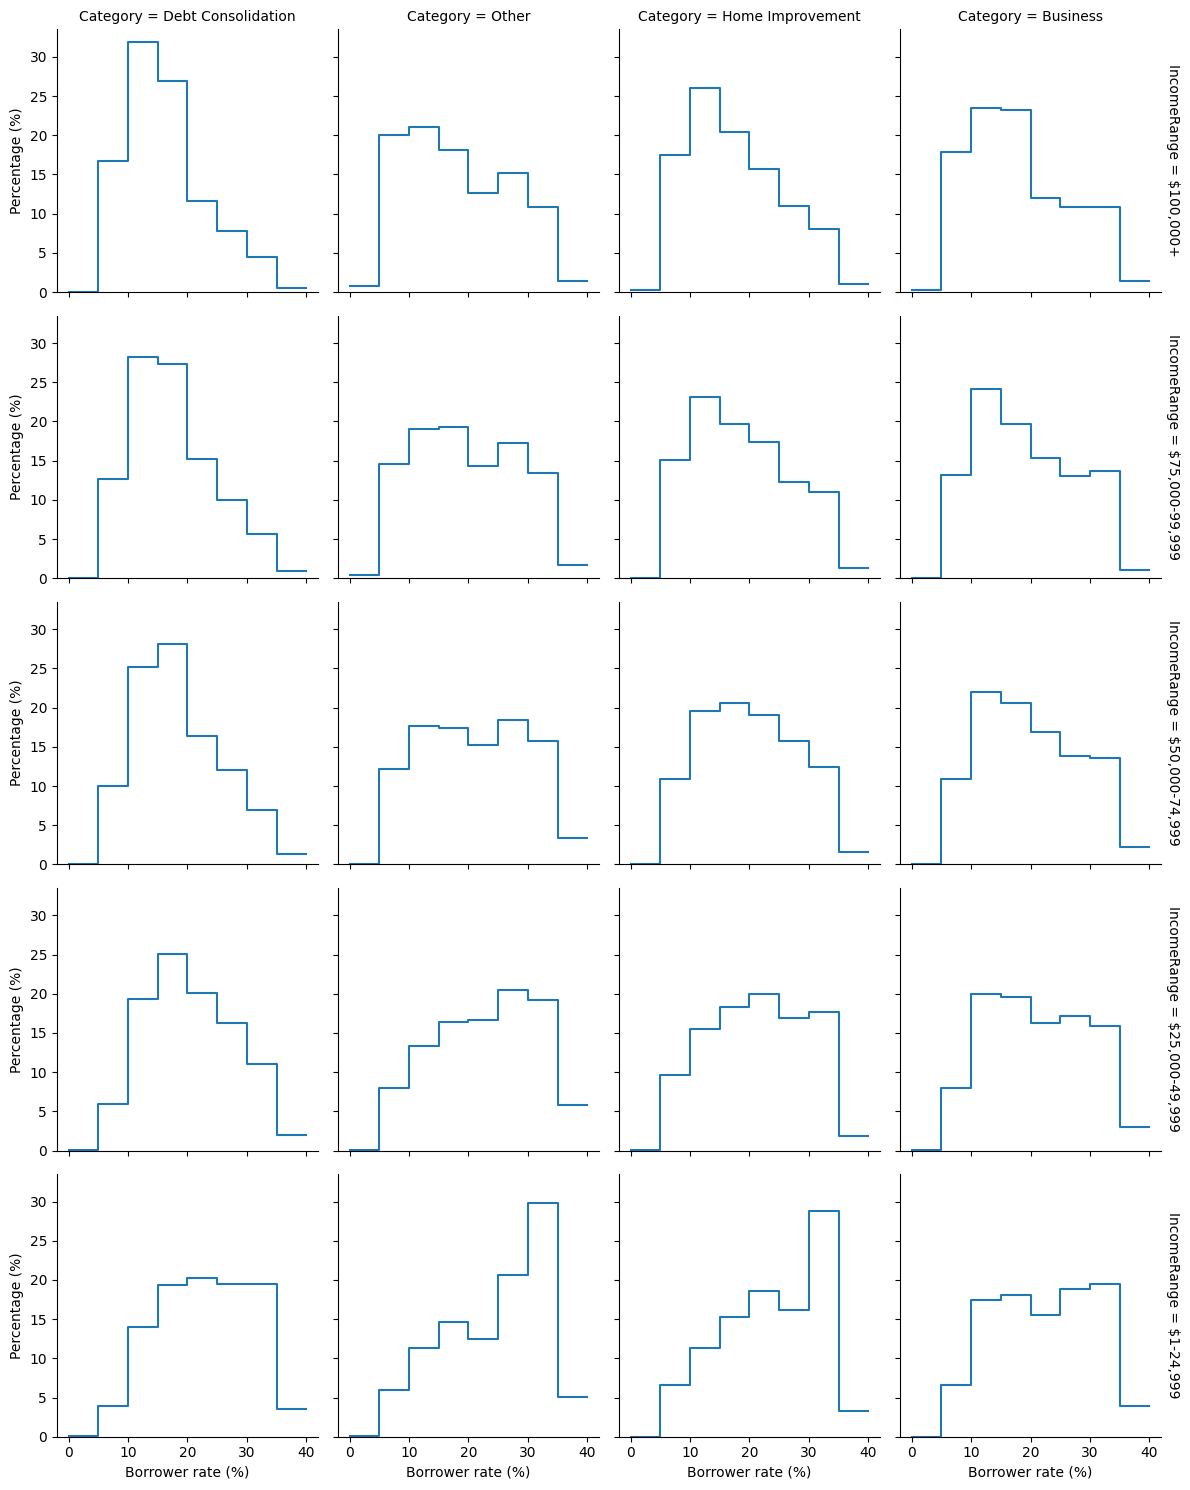

In [39]:
ax = sns.FacetGrid(data=dfsl, col='Category', col_order=col_order, margin_titles=True,
                   row='IncomeRange', row_order=row_order, palette='blue')
ax.map(sns.histplot, 'ScaledBorrowerRate', bins=bin_sl, stat='percent',
       element='step', kde=False, fill=False)
ax.set_xlabels('Borrower rate (%)')
ax.set_ylabels('Percentage (%)')
# plt.legend(bbox_to_anchor=(1.05,0.5,0.5,0.5),title='Income range')

**Summary** - Figure 6 shows the borrower rates distribution in each top category (column) and income range (row). In each column, with an increasing income range level, the highest borrower rate is gradually moving from a high rate (>30%) towards a lower rate (10-20%). It somehow indicates that for all loans in Prosper, borrowers who have a higher income may be in favor of a lower borrower rate.

**Figure 7** - How does the monthly loan payment relate to the stated monthly income with respect to the loan category?

Text(0, 0.5, 'Monthly loan payment ($)')

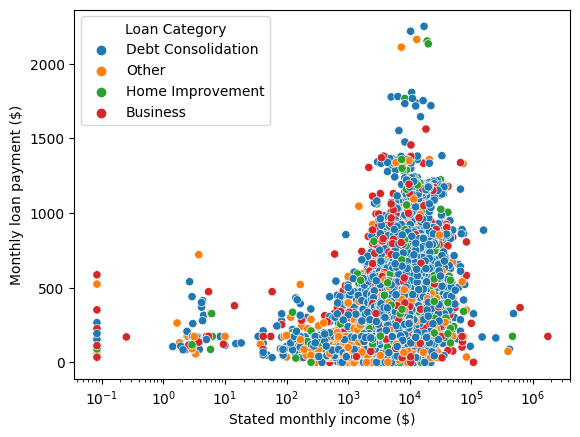

In [40]:
ax = sns.scatterplot(data=dfsl,x='StatedMonthlyIncome',y='MonthlyLoanPayment',hue='Category',hue_order=col_order)
ax.set_xscale('log')
plt.legend(title='Loan Category')
ax.set_xlabel('Stated monthly income ($)')
ax.set_ylabel('Monthly loan payment ($)')

**Summary** - Figure 7 seperate the monhtly loan pay and the borrowers' montly income of all loans into each loan category. There is no observable relationship on how the popular loan categories vary with the monthly income and loan pay. However, it is noticeable that the monthly load pay cap is somehow positively correlated to the borrower's monthly income. In other words, it is a trend that the borrowers are more capable of a higher loan pay debt when they have more income monthly.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Figure 6 shows the borrower rate distribution in each top category (column) and income range (row). In each column, with an increasing income range level, the highest borrower rate is gradually moving from a high rate (>30%) towards a lower rate (10-20%). It somehow indicates that for all loans in Prosper, borrowers who have a higher income may be in favor of a lower borrower interest rate.

> Figure 7 seperates the monhtly loan pay and the borrowers' monthly income of all loans into each loan category. There is no observable relationship on how the popular loan categories vary with the monthly income and loan pay. However, it is noticeable that the monthly load pay cap is somehow positively correlated to the borrower's monthly income. In other words, it is a trend that the borrowers are more capable of a higher loan pay debt when they have more income monthly.

### Were there any interesting or surprising interactions between features?

> It is interesting that in Figure 6, regardless which category that a loan is in, the most borrower interest rates alway lie towards 30% if the borrower is in a low income range, but towards 10% if the borrower has a higher income. 

## Conclusions
>The study focused on the relationships between the parameters of interest in the loan data provided by Prosper. Parameters of interest including _monthly load payment_, _borrower rate_, _monthly income_, _loan category_, and _income range_ were investigated and discussed. The investigation started from the univarible distributions of _the borrower rates_ and _load categories_, and completemeneted further by a set of bivariable and multivariable explorations. Some key findings are summarised as follows,

> * The entire borrowing rate resembles a normal distribution but right-skewed. Most of the loans are documented with a borrowing rate between 15-20%.

> * There is no observable trend between the borrowing rate and monthly load payment. However, it can be seen that, a large-amount monthly payment (e.g., over \\$1000) is normally with a relatively low borrowing rate below 15\%.

> * From the IQRs, Debt Consolidation is somehow with a lower median borrower rate and narrower rate range compared with other 3 top categories.

> * With a high monthly pay, the borrower rate is somehow limited to a lower value, but when the monthly pay is very low, the borrowers are somehow insensitve to the high interest rate.

> * With an increasing income range level, the highest borrower rate is gradually moving from a high rate (>30%) towards a lower rate (10-20%). It somehow indicates that for all loans in Prosper, borrowers who have a higher income may have a higher possibility to get a lower borrower rate.

> * There is no observable relationship on the popular loan categories vary with the monthly income and loan pay. However, it is noticeable that the monthly load pay cap is somehow positively correlated to the borrower's monthly income. In other words, the borrowers are more capable of a higher loan pay debt when they have more income monthly.

> * Generally, regardless which category that a loan is in, the most borrower rates alway lie towards 30% if the borrower is in a low income range, but towards 10% if the borrower has a higher income.